# Lesson 3 Assignment - Monty Hall Simulation
## Author - Salinee Kingbaisomboon
### UW NetID: 1950831

### Instructions
Simulate the conditional probabilities of the distributions for winning a car vs. a goat for the Monty Hall Problem that includes the following:
1. the cases for switching or not switching
2. histograms and summary statistics (at least mean and variance) of the results for winning the car or a goat for both strategies: switching or not switching
3. comparison of the cases to determine the best strategy
4. recommended strategy



#### Note: 
Please clearly outline the results and your recommendation with markdown text. Be sure your discussion includes narrative for your figures and tables so it is clear to the reader the importance of each bit of evidence.

In [5]:
# Import libraries
from __future__ import division 

import random
import numpy
import random
import pylab as pl
import pandas
from matplotlib import pyplot
import matplotlib.gridspec as gridspec

%matplotlib inline

# Simulation Process

- ## Instantiate Global Variables

In [6]:
simulations_numbers_list = [100, 1000, 100000] # list of numbers of realizations

- ### Primitive Simulation
When we didn't have the calculated conditional probability of monty hall problem beforehand, we have to find the distribution in a primitive approach. Below funtion will simulate and generate the histogram of monty hall's distributions for winning a car vs. a goat.

In [7]:
def sim_monty_hall_game_primitive(isSwitchedDoor, n_simulations):
    number_of_simulations = range(n_simulations)
    win_car = [0] * n_simulations # intantiate zero array with length = number of simulation
    win_goat = [0] * n_simulations # intantiate zero array with length = number of simulation

    for i in number_of_simulations:
        door_numbers = [1,2,3] # there are three doors
        player_final_door = 0 # first choice of door player select
        player_first_door = 0 # final choice of door player select (used when player want to switch the door (isSwitchedDoor = True))
    
        car_door = random.randint(1,3) # winng door (car's behind) can be 1, 2 or 3
        player_first_door = random.randint(1,3) # 1st selected door choice between 1, 2 or 3
        door_numbers.remove(car_door) # remove this winning door from selectable list for monty (monty won't select this door)
        if player_first_door != car_door : 
            door_numbers.remove(player_first_door) # monty will open a different door from the player
            
        monty_opened = random.choice(door_numbers) # monty open whatever door choice left for him
        
        if isSwitchedDoor == True: # player want to switch the door
            door_numbers = [1,2,3]
            door_numbers.remove(monty_opened)
            door_numbers.remove(player_first_door)
            player_final_door = door_numbers[0]
        else:
            player_final_door = player_first_door # player want to stay with the first choice
        
        if player_final_door == car_door: # player open the winning door
             win_car[i] = 1
        elif player_final_door != car_door: # player open the goat door
             win_goat[i] = 1
                
    game_results = pandas.DataFrame({
        "switch_door": isSwitchedDoor,
        "play": 1,
        "win": win_car,
        "lose": win_goat,
    })
    game_results.head()
     
    return game_results

### Probability Distribution when player didn't switch the door (**Primitive Approach**)

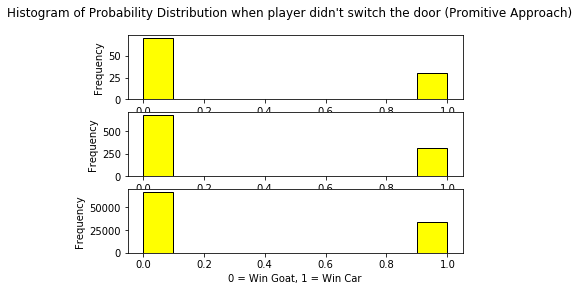

In [8]:
fig = pyplot.figure()
gs = gridspec.GridSpec(3, 1) # 3 rows, 1 column
i = 0 # counter for the subplot
for n in simulations_numbers_list:
    ax = fig.add_subplot(gs[i, 0])
    resultNotSwitch = sim_monty_hall_game_primitive(isSwitchedDoor=False, n_simulations=n)
    resultNotSwitch.loc[:,'win'].plot(kind='hist', bins = 10, color='yellow',ax=ax, edgecolor='black')
    pl.suptitle("Histogram of Probability Distribution when player didn't switch the door (Primitive Approach)")
    ax.set_xlabel("0 = Win Goat, 1 = Win Car")
    i += 1

### Probability Distribution when player decide to switch the door (**Primitive Approach**)

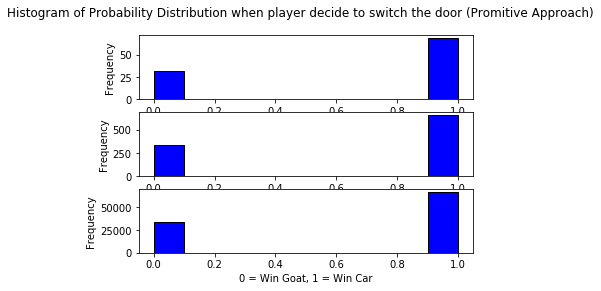

In [9]:
fig = pyplot.figure()
gs = gridspec.GridSpec(3, 1) # 3 rows, 1 column
i = 0 # counter for the subplot
for n in simulations_numbers_list:
    ax = fig.add_subplot(gs[i, 0])
    resultSwitch = sim_monty_hall_game_primitive(isSwitchedDoor=True, n_simulations=n)
    resultSwitch.loc[:,'win'].plot(kind='hist', bins = 10, color='blue',ax=ax, edgecolor='black')
    pl.suptitle("Histogram of Probability Distribution when player decide to switch the door (Primitive Approach)")
    ax.set_xlabel("0 = Win Goat, 1 = Win Car")
    i += 1

- ### Binomial Sampling Distribution Simulation
When we have the theoretical conditional probability values of monty hall problem (from **L03-2-IntroToProbability**), we can use the built in numpy **Binomial Sampling** to generate the sample, find **Means** and **Variance** easily. Below funtion will simulate and generate the histogram of monty hall's distributions for winning a car vs. a goat.

***
**Note:** The reason I decide to use _Binomial Sampling Distribution_ is that, for Binomial, the result will be ($\{success, fail \}$) which is the same type of result when playing monty hall gameshow.
***

In [10]:
def sim_monty_hall_game_binomial(isSwitchedDoor, simulations_list):
    p = 0 # probability to generate the sampling
    color = '' # plot different color for switching, not-switching selected door
    if isSwitchedDoor:
        p = 2/3 # from L03-2-IntroToProbability
        color = 'blue'
    else:
        p = 1/3 # from L03-2-IntroToProbability
        color = 'yellow'

    binom_samples_win = [numpy.random.binomial(1, p, n) for n in simulations_list] # sample arrays
    binom_sample_means = [samples.mean() for samples in binom_samples_win] # Means array
    binom_sample_vars = [samples.var() for samples in binom_samples_win] # Variance array
    
    for i in range(0, len(binom_samples_win)):
        pyplot.figure(figsize=(6, 3))
        pyplot.hist(binom_samples_win[i], color=color, edgecolor='black')
        pyplot.xlabel('0 = Win Goat, 1 = Win Car')
        pyplot.ylabel('Frequency')
        _ = pyplot.title('Histogram of Probability Distribution when player ' + ('switch' if isSwitchedDoor else 'did not switch') + ' the door (Binomial Sampling Approach) for N = ' + str(simulations_list[i]))
        
    return pandas.DataFrame({
    'SampleMean': binom_sample_means,
    'SampleVariance': binom_sample_vars
    })

### Probability Distribution when player didn't switch the door (**Binomial Sampling Approach**)

,SampleMean,SampleVariance
0,0.3400,0.224400
1,0.3300,0.221100
2,0.3332,0.222178


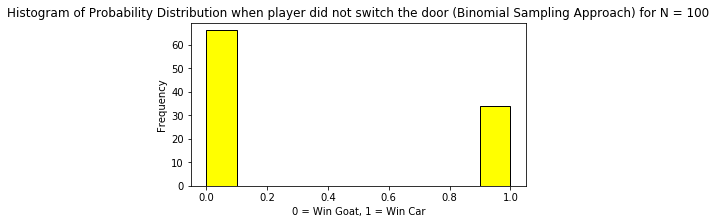

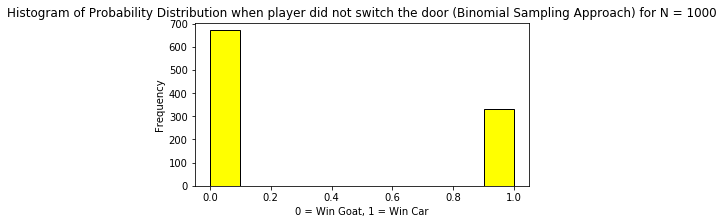

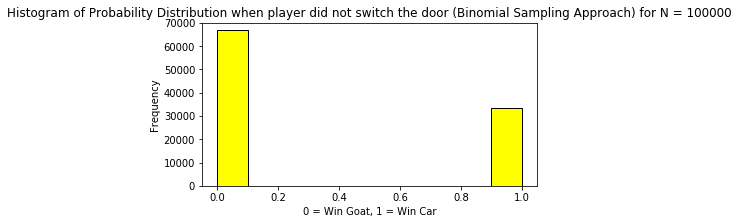

In [11]:
statisticsNotSwitch = sim_monty_hall_game_binomial(isSwitchedDoor=False, simulations_list=simulations_numbers_list)
statisticsNotSwitch

### Probability Distribution when player decide to switch the door (**Binomial Sampling Approach**)

,SampleMean,SampleVariance
0,0.69000,0.213900
1,0.67800,0.218316
2,0.66776,0.221857


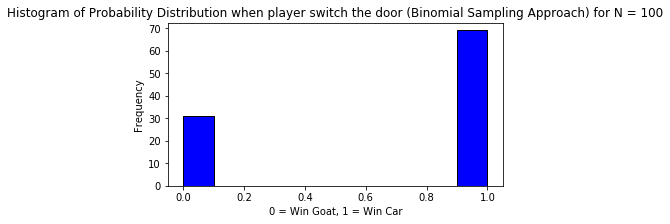

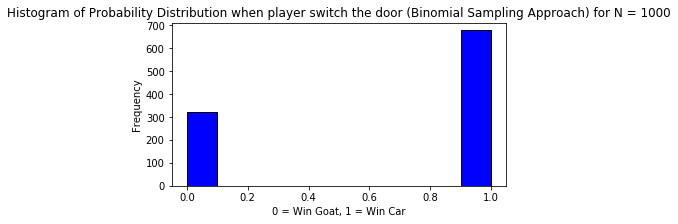

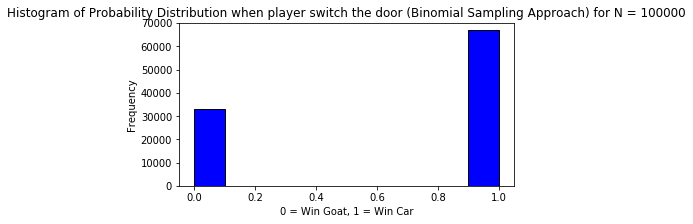

In [12]:
statisticsSwitch = sim_monty_hall_game_binomial(isSwitchedDoor=True, simulations_list=simulations_numbers_list)
statisticsSwitch

- ## Recommended Strategy
Based on the histogram from both **Primitive** and **Binomial Sampling**, we can conclude that the best strategy to win this game is to always switch the door after the first selection. 

We can clearly see that the theoretical conditional probability values is legit since the histogram plots from binomial bampling are pretty much the same as histogram plots from Primitive approach for both switching or not switching cases.
